<h1><center>SCI KIT APPLICATIONS. UNSUPERVISED LEARNING</center></h1>
<h2><center> CLUSTERING: HANDWRITTEN DIGITS</center></h2>


## 1.  CONCEPTUAL FRAMEWORK

For further reference go to:

**Winters-Hill S. and S. Merat** (2007). SVM Clustering. BMV Bioinformatics, 8, Suppl 7. Available at:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2099486/



Support Vector Machines (SVMs) provide a powerful method for classification (supervised learning). Use of SVMs for clustering (unsupervised learning) is now being considered in a number of different ways

**SVM CLUSTERING**

An SVM-based clustering algorithm is introduced that clusters data with no a priori knowledge of input classes. The algorithm initializes by first running a binary SVM classifier against a data set with each vector in the set randomly labelled, this is repeated until an initial convergence occurs. Once this initialization step is complete, the SVM confidence parameters for classification on each of the training instances can be accessed. The lowest confidence data (e.g., the worst of the mislabelled data) then has its' labels switched to the other class label. The SVM is then re-run on the data set (with partly re-labelled data) and is guaranteed to converge in this situation since it converged previously, and now it has fewer data points to carry with mislabelling penalties. This approach appears to limit exposure to the local minima traps that can occur with other approaches. Thus, the algorithm then improves on its weakly convergent result by SVM re-training after each re-labeling on the worst of the misclassified vectors – i.e., those feature vectors with confidence factor values beyond some threshold. The repetition of the above process improves the accuracy, here a measure of separability, until there are no misclassifications. Variations on this type of clustering approach are shown.

Non-parametric SVM-based clustering methods may allow for much improved performance over parametric approaches, particularly if they can be designed to inherit the strengths of their supervised SVM counterparts.


Support Vector Machines (SVMs) provide a very efficient mechanism to construct a separating hyperplane (see Fig. ​Fig.1),1), surrounded by the thickest margin, using a set of training data. Prediction is made according to some measure of the distance between the test data and the hyperplane. Cover's theorem states that complex pattern-classification problems can be transformed into a new feature space where the patterns are more likely to be linearly separable, provided that the transformation itself is nonlinear and that the feature space is in a high enough dimension [1]. The SVM method achieves such a transformation by choosing a qualified kernel.



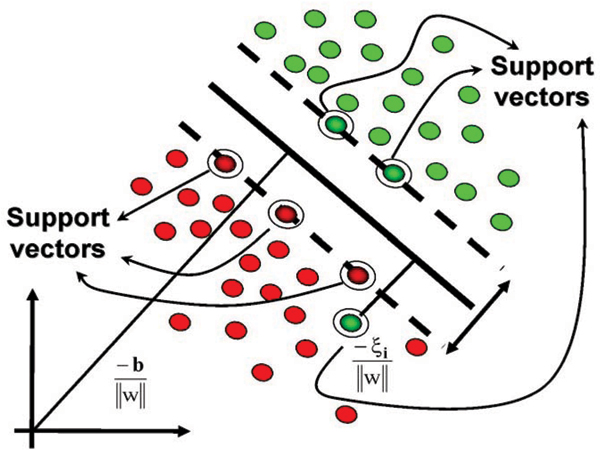

The geometry of the hyperplane depends on the kernel and the kernel parameters . The decision hyperplane is linear in whenn using the linear kernel. May be vurved when using a non-linear kernel.

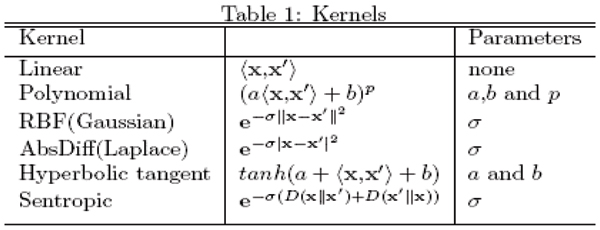

This is the case of the use of the linear kernel.

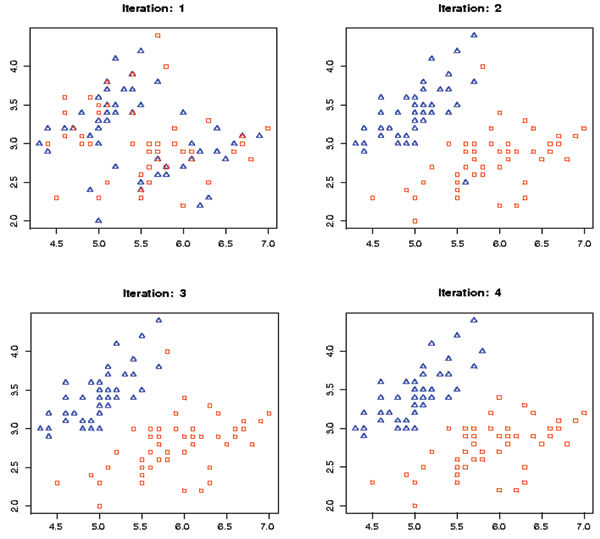

This is the case of usign a third degree polynomial kernel

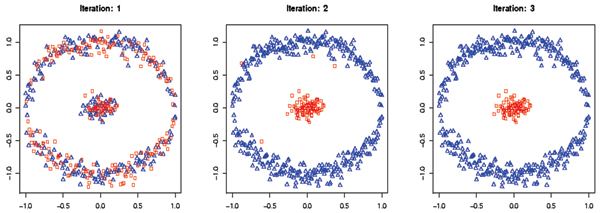

**K-MEANS CLUSTERING**

k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-Means minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. Better Euclidean solutions can for example be found using k-medians and k-medoids.

The problem is computationally difficult (NP-hard); however, efficient heuristic algorithms converge quickly to a local optimum. These are usually similar to the expectation-maximization algorithm for mixtures of Gaussian distributions via an iterative refinement approach employed by both k-means and Gaussian mixture modeling. They both use cluster centers to model the data; however, k-means clustering tends to find clusters of comparable spatial extent, while the expectation-maximization mechanism allows clusters to have different shapes.

The algorithm has a loose relationship to the k-nearest neighbor classifier, a popular machine learning technique for classification that is often confused with k-means due to the name. Applying the 1-nearest neighbor classifier to the cluster centers obtained by k-means classifies new data into the existing clusters. This is known as nearest centroid classifier or Rocchio algorithm.

## 2. EXAMPLE

This exaple addresses the problem of handwriting recognition using a ***non supervised algorithm***.  The data file is exacly the same as the one used in the supervised example.

In this example we compare the various initialization strategies for K-means in terms of runtime and quality of the results.

As the ground truth is known here, we also apply different cluster quality metrics to judge the goodness of fit of the cluster labels to the ground truth.


In [2]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

**A note on seeding the generator**

This method is called when RandomState is initialized. It can be called again to re-seed the generator. 

The seed is for when we want repeatable results. If you don't want that, don't seed your generator. It will use the system time for an elegant random seed.

In [3]:
print(np.random.seed(42))

None


### 2.1. LOAD THE DATA

**EXPLORTING THE A SCIKIT DATA SET**

In [4]:
X_digits, y_digits = load_digits(return_X_y=True)

In [5]:
X_digits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
y_digits

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
n_samples

1797

In [11]:
n_features

64

** DEFINITIONS**

In [7]:
np.random.seed(42)

X_digits, y_digits = load_digits(return_X_y=True)
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 1797, 	 n_features 64


## 2.2. RUNNING THE CALCULATIONS

**METRICS**

- homo: homogeneity score

- compl :completeness score

- v-meas: V measure

- ARI: adjusted Rand index

- AMI: adjusted mutual information

- silhouette: silhouette coefficient

**THE METHODS**

https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

We will compare the results of three methods.

- random : Random location of the centroids.
- k++ : In data mining, k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm. It was proposed in 2007 by David Arthur and Sergei Vassilvitskii, as an approximation algorithm for the NP-hard k-means problem—a way of avoiding the sometimes poor clusterings found by the standard k-means algorithm. It is similar to the first of three seeding methods proposed, in independent work, in 2006 by Rafail Ostrovsky, Yuval Rabani, Leonard Schulman and Chaitanya Swamy. 
- PCA: See  https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

In [18]:
print(78 * '_')
print('ini\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhou')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(78 * '_')


______________________________________________________________________________
ini		time	inertia	homo	compl	v-meas	ARI	AMI	silhou
k-means++	0.25s	69748	0.674	0.721	0.697	0.560	0.671	0.154
random   	0.19s	69858	0.656	0.699	0.677	0.545	0.653	0.142
PCA-based	0.04s	70791	0.667	0.695	0.680	0.554	0.664	0.146
______________________________________________________________________________


## 3. VISUALIZATION

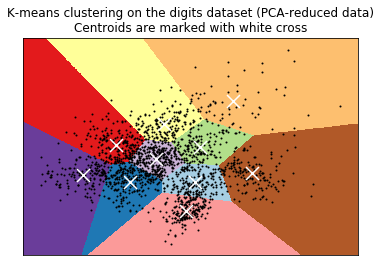

In [19]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()